# Medication Data (meps_meds.csv) Exploration

In [3]:
import pandas as pd

medication_df = pd.read_csv('../data/meps_meds.csv', index_col=0)
medication_df

,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
1,10007104,3,2011,AMOXICILLIN,143988775,75.00,SUSR
2,10007104,3,2011,OTIC EDGE SOLUTION,68032032814,14.00,SOL
3,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.00,SPR
4,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.00,SPR
5,10008102,9,2011,DIPHENHYDRAM,603333921,30.00,CAP
...,...,...,...,...,...,...,...
3000952,77294102,-1,-1,LEXAPRO,58016097702,30.00,TAB
3000962,77294102,-1,-1,TRICOR,67544103398,90.00,TAB
3000972,77294102,-1,-1,TRICOR,67544103398,90.00,TAB
3000982,77294102,-1,-8,AZITHROMYCIN,16590036206,6.00,TAB


In [4]:
medication_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148347 entries, 1 to 3000992
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1148347 non-null  int64  
 1   rxStartMonth  1148347 non-null  int64  
 2   rxStartYear   1148347 non-null  int64  
 3   rxName        1148347 non-null  object 
 4   rxNDC         1148347 non-null  int64  
 5   rxQuantity    1148347 non-null  float64
 6   rxForm        1148347 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 70.1+ MB


In [5]:
medication_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1148347.0,5.523596e+07,2.728584e+07,10007101.0,40638103.0,49475102.0,8.118210e+07,8.968810e+07
rxStartMonth,1148347.0,5.184600e-01,4.087907e+00,-9.0,-1.0,-1.0,1.000000e+00,1.200000e+01
rxStartYear,1148347.0,1.172427e+03,9.895660e+02,-14.0,-1.0,2000.0,2.008000e+03,2.011000e+03
rxNDC,1148347.0,2.226109e+10,2.834269e+10,-9.0,149047204.0,591038505.0,5.486835e+10,9.920707e+10
rxQuantity,1148347.0,5.942380e+01,3.702845e+02,-9.0,30.0,30.0,6.800000e+01,1.200000e+05


## Check values in every columns

In [6]:
# Check how many duplicates and identical ids
medication_df.id.value_counts()

id
44246101    578
42632101    568
75204101    553
42253102    523
41020101    508
           ... 
49012101      1
49017102      1
49032102      1
75922106      1
77293103      1
Name: count, Length: 41783, dtype: int64

In [7]:
# Look into the most frequent id
medication_df[medication_df.id == 44246101]

,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
209171,44246101,1,2010,PREDNISOLONE,61314063705,5.0,SUSP
209172,44246101,-1,1995,WARFARIN,68382005310,90.0,TABS
209173,44246101,-1,-8,POT CHLORIDE,781152601,60.0,TBCR
209174,44246101,-1,-8,FUROSEMIDE,781144605,30.0,TABS
209175,44246101,-1,-8,FUROSEMIDE,781144605,30.0,TABS
...,...,...,...,...,...,...,...
699562,44246101,-1,-8,LEVOTHYROXINE SODIUM,527134610,30.0,TAB
699572,44246101,-1,-8,LEVOTHYROXINE SODIUM,527134610,30.0,TAB
699582,44246101,-1,-8,ALENDRONATE,65862032904,4.0,TAB
699592,44246101,-1,-8,ALENDRONATE,65862032904,4.0,TAB


### Numerical columns (rxStartMonth, rxStartYear, rxNDC, rxQuantity)

<Axes: ylabel='rxStartMonth'>

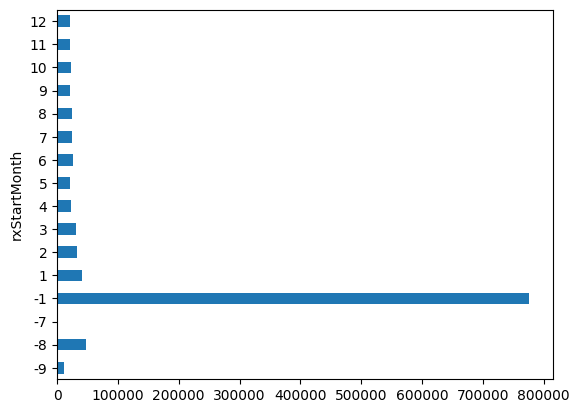

In [8]:
# Check how should the feature rxStartMonth look: should be 1-12
medication_df.rxStartMonth.value_counts().sort_index().plot(kind='barh')

<Axes: ylabel='rxStartYear'>

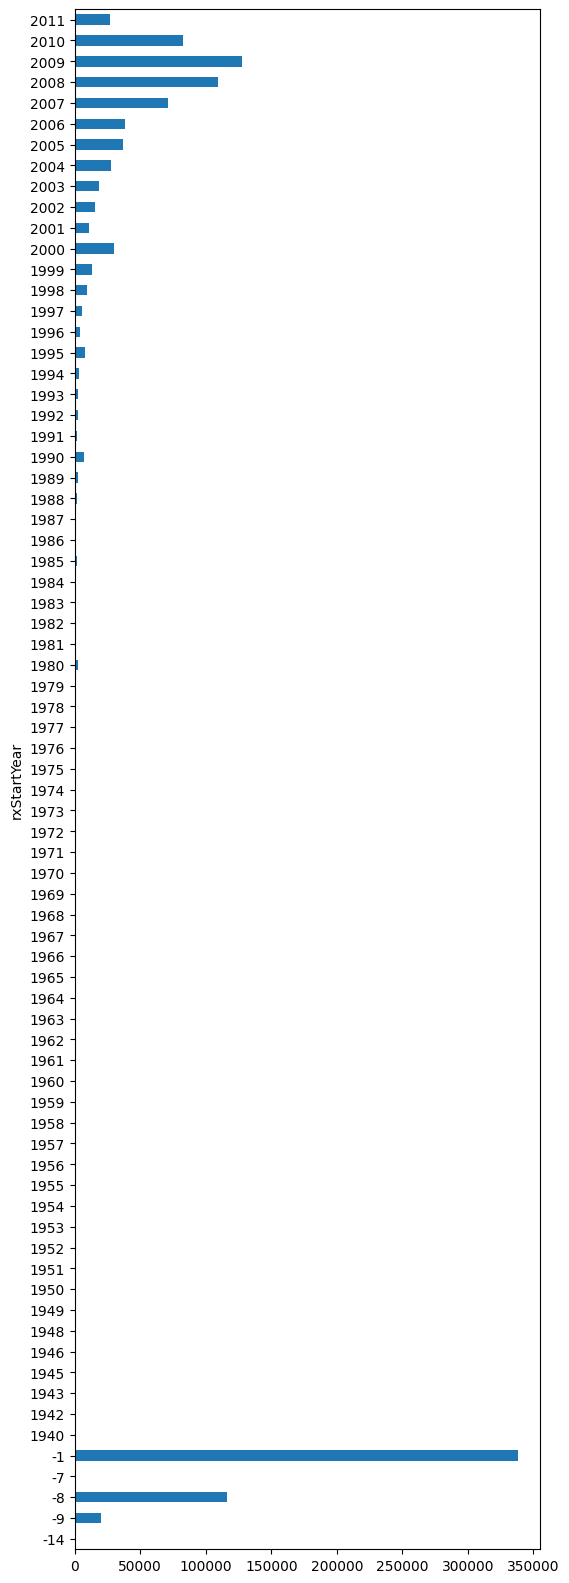

In [9]:
# Check how should the feature rxStartYear look
medication_df.rxStartYear.value_counts().sort_index().plot(kind='barh', figsize=(6, 20))

In [10]:
# rxNDC: It looks more straight forward
medication_df.rxNDC.value_counts().sort_index()

rxNDC
-9              4669
 2080303           6
 2197590           1
 2300475          30
 2322730          53
                ... 
 99207052510       5
 99207052530      11
 99207052560       7
 99207074404       2
 99207074560       1
Name: count, Length: 28736, dtype: int64

In [11]:
# rxQuantity: Only 1 -ve number
# Is the large number reasonable?
medication_df.rxQuantity.value_counts().sort_index()

rxQuantity
-9.00         307
 0.05          55
 0.16          26
 0.20           2
 0.24         100
             ... 
 103904.00      3
 104016.00      3
 104960.00      2
 110520.00      2
 120000.00      1
Name: count, Length: 606, dtype: int64

In [12]:
# Not many extremely large number, so we just keep it
medication_df.rxQuantity.value_counts().sort_index().tail(10)

rxQuantity
10000.0     10
15000.0      1
21330.0     15
40000.0      1
101104.0     1
103904.0     3
104016.0     3
104960.0     2
110520.0     2
120000.0     1
Name: count, dtype: int64

### rxName is more complicated

In [13]:
medication_df.rxName.value_counts().sort_index()

rxName
 CLOPIDOGREL                   2
 HYDROCHLOROTHIAZIDE (HCTZ)    1
 HYDROCHLOROTHIZAIDE           1
 LIPITOR                       3
(ARMOUR) THYROID (1GR)         1
                              ..
ZYRTEC-D ALG                   1
ZYVOX                          6
ZYVOX (CAPLET)                 1
ZYVOX (P.C.)                   7
ZZFEXOFENADINE                 2
Name: count, Length: 9218, dtype: int64

In [14]:
# See if any value contains numbers
medication_df.rxName[medication_df.rxName.str.contains('.*[0-9].*', regex=True)].value_counts().sort_index()

rxName
(ARMOUR) THYROID (1GR)        1
-9                           66
1 ANTI-INFECTIVES           351
1.5 INCH 27 GAUGE NEEDLE      1
1/2ML TB SYR                  3
                           ... 
ZOVIA 1/35E (6 X 28)         52
ZOVIA 1/50                   18
ZOVIA 1/50E (6 X 28)         15
ZYPREXA 10MG                 26
ZYPREXA 15MG                 15
Name: count, Length: 1336, dtype: int64

In [15]:
# See if any value is ONLY numbers -> Drop this!
medication_df[pd.to_numeric(medication_df['rxName'], errors='coerce').notna()].rxName.value_counts().sort_index()

rxName
-9    66
10    29
Name: count, dtype: int64

### rxForm: Do the same thing

In [16]:
medication_df.rxForm.value_counts().sort_index()

rxForm
-7       185
-8      1097
-9      9855
ACT       55
AEPB    2331
        ... 
VIAL     537
WAB       19
WAFR       4
WASH      10
Wash      27
Name: count, Length: 328, dtype: int64

In [17]:
# See if any value contains numbers
medication_df.rxForm[medication_df.rxForm.str.contains('.*[0-9].*', regex=True)].value_counts().sort_index()

rxForm
-7        185
-8       1097
-9       9855
C12        23
C24      1382
CP12      320
CP24     4127
PT24      281
PT72      436
T12       562
T24       921
TB12     2576
TB24    10800
Name: count, dtype: int64

In [18]:
# See if any value is ONLY numbers -> Drop this!
medication_df[pd.to_numeric(medication_df['rxForm'], errors='coerce').notna()].rxForm.value_counts().sort_index()

rxForm
-7     185
-8    1097
-9    9855
Name: count, dtype: int64

In [19]:
# Confirm this regex removes only the values above (-7, -8, -9)
# -> 325 rows compare with the prev 328 rows
medication_df[~medication_df['rxForm'].str.match(r'^-?\d+(\.\d+)?$')].rxForm.value_counts().sort_index()

rxForm
ACT            55
AEPB         2331
AER          3263
AER SPRAY       3
AERA         3531
             ... 
VIAL          537
WAB            19
WAFR            4
WASH           10
Wash           27
Name: count, Length: 325, dtype: int64

In [20]:
# Double check
medication_df[~medication_df['rxForm'].str.match(r'^-?\d+(\.\d+)?$')].rxForm[medication_df.rxForm.str.contains('.*[0-9].*', regex=True)].value_counts().sort_index()

rxForm
C12        23
C24      1382
CP12      320
CP24     4127
PT24      281
PT72      436
T12       562
T24       921
TB12     2576
TB24    10800
Name: count, dtype: int64

## Clean the data

In [21]:
# Remove -ve numbers from rxStartMonth
medication_df = medication_df[medication_df['rxStartMonth'] > 0]

# Remove -ve numbers from rxStartYear
medication_df = medication_df[medication_df['rxStartYear'] > 0]

# Remove -ve numbers from rxNDC
medication_df = medication_df[medication_df['rxNDC'] > 0]

# Remove -ve numbers from rxQuantity
medication_df = medication_df[medication_df['rxQuantity'] > 0]

# Remove numbers from rxName
medication_df = medication_df[~medication_df['rxName'].str.match(r'^-?\d+(\.\d+)?$')]

# Remove numbers from rxForm
medication_df = medication_df[~medication_df['rxForm'].str.match(r'^-?\d+(\.\d+)?$')]

# Drop duplicate rows
medication_df = medication_df.drop_duplicates()

# Reset dataframe index
medication_df = medication_df.reset_index(drop=True)

medication_df

,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
0,10007104,3,2011,AMOXICILLIN,143988775,75.00,SUSR
1,10007104,3,2011,OTIC EDGE SOLUTION,68032032814,14.00,SOL
2,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.00,SPR
3,10008102,9,2011,DIPHENHYDRAM,603333921,30.00,CAP
4,10008102,9,2011,CHLD ALLERGY,24385037926,100.00,LIQD
...,...,...,...,...,...,...,...
148333,77293102,6,2007,INDOMETHACIN,378014701,25.00,CAP
148334,77293103,3,2007,AMOXICILLIN,93415580,300.00,PDR
148335,77294101,2,2006,PRILOSEC OTC,37000045503,30.00,TCP
148336,77294102,10,2006,PROVIGIL,63459010101,30.00,TAB


In [22]:
# Visualize the overview again
medication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148338 entries, 0 to 148337
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148338 non-null  int64  
 1   rxStartMonth  148338 non-null  int64  
 2   rxStartYear   148338 non-null  int64  
 3   rxName        148338 non-null  object 
 4   rxNDC         148338 non-null  int64  
 5   rxQuantity    148338 non-null  float64
 6   rxForm        148338 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 7.9+ MB


In [23]:
medication_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,148338.0,5.349531e+07,2.734280e+07,10007101.00,40168102.0,48045104.0,8.100110e+07,8.968810e+07
rxStartMonth,148338.0,6.138407e+00,3.578313e+00,1.00,3.0,6.0,9.000000e+00,1.200000e+01
rxStartYear,148338.0,2.008908e+03,1.168287e+00,2005.00,2008.0,2009.0,2.010000e+03,2.011000e+03
rxNDC,148338.0,2.369458e+10,2.824723e+10,2197590.00,169750111.0,603498276.5,5.486803e+10,9.920707e+10
rxQuantity,148338.0,6.105529e+01,3.686835e+02,0.05,20.0,30.0,6.000000e+01,1.200000e+05


### Check columns values again

<Axes: ylabel='rxStartMonth'>

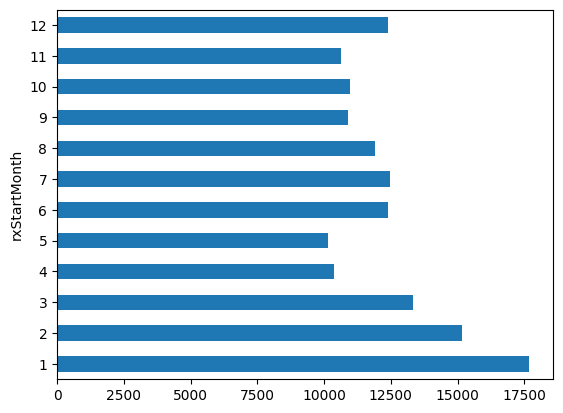

In [24]:
medication_df.rxStartMonth.value_counts().sort_index().plot(kind='barh')

<Axes: ylabel='rxStartYear'>

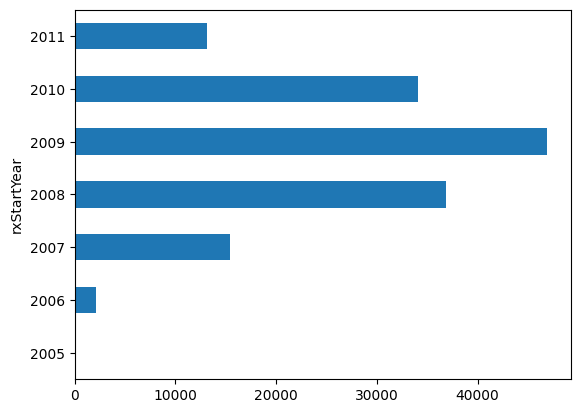

In [25]:
medication_df.rxStartYear.value_counts().sort_index().plot(kind='barh')

In [26]:
medication_df.rxName.value_counts().sort_index()

rxName
 HYDROCHLOROTHIAZIDE (HCTZ)     1
 HYDROCHLOROTHIZAIDE            1
1.5 INCH 27 GAUGE NEEDLE        1
30G 0.5" INSULIN SYRINGE        3
3ML SYRINGE                     2
                               ..
ZYRTEC OTC                      1
ZYRTEC-D                       12
ZYVOX                           4
ZYVOX (CAPLET)                  1
ZYVOX (P.C.)                    2
Name: count, Length: 6968, dtype: int64

In [27]:
medication_df.rxNDC.value_counts().sort_index()

rxNDC
2197590         1
2300475         2
2322730        10
2322830        23
2322930        29
               ..
99207051746     2
99207052510     4
99207052530     4
99207052560     5
99207074560     1
Name: count, Length: 18518, dtype: int64

In [28]:
medication_df.rxQuantity.value_counts().sort_index()

rxQuantity
0.05          5
0.16          2
0.20          2
0.24         16
0.30          1
             ..
8000.00       2
15000.00      1
21330.00      1
40000.00      1
120000.00     1
Name: count, Length: 458, dtype: int64

In [29]:
medication_df.rxForm.value_counts().sort_index()

rxForm
ACT            7
AEPB         169
AER          541
AER SPRAY      2
AERA         503
            ... 
VIAL          36
WAB            1
WAFR           1
WASH           3
Wash           2
Name: count, Length: 284, dtype: int64

In [30]:
medication_df.id.value_counts()

id
17082101    79
43252101    64
17608101    59
41377101    57
41400101    57
            ..
73448103     1
73450101     1
45014103     1
45014101     1
77293103     1
Name: count, Length: 35667, dtype: int64

Everything looks fine, but seems some clients got a lot of history

## Look into specific case

In [31]:
medication_df[medication_df['id'] == 17082101]

,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
16799,17082101,12,2010,AZITHROMYCIN,93202623,15.0,SUSR
16800,17082101,1,2010,CHLORHEX GLU,50383072016,473.0,SOLN
16801,17082101,1,2010,TRAZODONE,50111044101,30.0,TABS
16802,17082101,1,2010,IBUPROFEN,53746046605,30.0,TAB
16803,17082101,1,2010,CYCLOBENZAPR,603307821,120.0,TABS
...,...,...,...,...,...,...,...
33406,17082101,12,2010,AZITHROMYCIN,59762306001,6.0,TABS
33407,17082101,1,2010,HYDROCHLOROT,603385632,30.0,TABS
33408,17082101,1,2010,SIMVASTATIN,68382006805,90.0,TABS
33409,17082101,1,2010,FUROSEMIDE,378020810,90.0,TABS


In [32]:
medication_df[medication_df['id'] == 17082101].rxStartYear.value_counts()

rxStartYear
2010    63
2011    16
Name: count, dtype: int64

In [33]:
medication_df[medication_df['id'] == 17082101].rxStartMonth.value_counts()

rxStartMonth
1     61
4     14
12     2
9      1
10     1
Name: count, dtype: int64

In [34]:
by = ['rxStartYear', 'rxStartMonth']  # groupby 'by' argument
grouped_df = medication_df[medication_df['id'] == 17082101].groupby(by).apply(lambda a: a.drop(by, axis=1)[:])
grouped_df

/var/folders/m_/2kwyqrdd3hl2_rx9qpm527p80000gn/T/ipykernel_11021/445195809.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = medication_df[medication_df['id'] == 17082101].groupby(by).apply(lambda a: a.drop(by, axis=1)[:])


id            rxName        rxNDC  \
rxStartYear rxStartMonth                                                  
2010        1            16800  17082101      CHLORHEX GLU  50383072016   
                         16801  17082101         TRAZODONE  50111044101   
                         16802  17082101         IBUPROFEN  53746046605   
                         16803  17082101      CYCLOBENZAPR    603307821   
                         16804  17082101        CLONAZEPAM    603294932   
...                                  ...               ...          ...   
2011        4            16847  17082101  HYDROCODONE/APAP  23490569307   
                         16848  17082101      CYCLOBENZAPR    603307934   
                         16849  17082101     OMEPRAZOLE DR  62175013637   
            9            16850  17082101           SPIRIVA    597007541   
            10           16851  17082101      METOPROL TAR    378001805   

                                rxQuantity rxForm  
rxStartYear rxStartMonth                           
2010        1            16800       473.0   SOLN  
                         16801        30.0   TABS  
                         16802        30.0    TAB  
                         16803       120.0   TABS  
                         16804        30.0   TABS  
...                                    ...    ...  
2011        4            16847        10.0    TAB  
                         16848        90.0   TABS  
                         16849        30.0    TAB  
            9            16850        30.0   CAPS  
            10           16851        60.0   TABS  

[79 rows x 5 columns]

In [35]:
index_values = grouped_df.index.tolist() # (rxStartYear, rxStartMonth, index)

# Create Filtered indices (by year)
filtered_indices = []

for index_tuple in index_values:
    if index_tuple[0] == 2010:
        filtered_indices.append(index_tuple)

# Use filtered indices to select rows
filtered_df = grouped_df.loc[filtered_indices]

filtered_df

id        rxName        rxNDC  \
rxStartYear rxStartMonth                                              
2010        1            16800  17082101  CHLORHEX GLU  50383072016   
                         16801  17082101     TRAZODONE  50111044101   
                         16802  17082101     IBUPROFEN  53746046605   
                         16803  17082101  CYCLOBENZAPR    603307821   
                         16804  17082101    CLONAZEPAM    603294932   
...                                  ...           ...          ...   
                         33408  17082101   SIMVASTATIN  68382006805   
                         33409  17082101    FUROSEMIDE    378020810   
                         33410  17082101     BISACODYL    536338101   
            12           16799  17082101  AZITHROMYCIN     93202623   
                         33406  17082101  AZITHROMYCIN  59762306001   

                                rxQuantity rxForm  
rxStartYear rxStartMonth                           
2010        1            16800       473.0   SOLN  
                         16801        30.0   TABS  
                         16802        30.0    TAB  
                         16803       120.0   TABS  
                         16804        30.0   TABS  
...                                    ...    ...  
                         33408        90.0   TABS  
                         33409        90.0   TABS  
                         33410        30.0   TBEC  
            12           16799        15.0   SUSR  
                         33406         6.0   TABS  

[63 rows x 5 columns]

In [36]:
index_values = grouped_df.index.tolist() # (rxStartYear, rxStartMonth, index)

# Create Filtered indices (by month and year)
filtered_indices = []

for index_tuple in index_values:
    if index_tuple[0] == 2010 and index_tuple[1] == 1:
        filtered_indices.append(index_tuple)

# Use filtered indices to select rows
filtered_df = grouped_df.loc[filtered_indices]

filtered_df

id        rxName        rxNDC  \
rxStartYear rxStartMonth                                              
2010        1            16800  17082101  CHLORHEX GLU  50383072016   
                         16801  17082101     TRAZODONE  50111044101   
                         16802  17082101     IBUPROFEN  53746046605   
                         16803  17082101  CYCLOBENZAPR    603307821   
                         16804  17082101    CLONAZEPAM    603294932   
...                                  ...           ...          ...   
                         33405  17082101    DICLOFENAC    591033801   
                         33407  17082101  HYDROCHLOROT    603385632   
                         33408  17082101   SIMVASTATIN  68382006805   
                         33409  17082101    FUROSEMIDE    378020810   
                         33410  17082101     BISACODYL    536338101   

                                rxQuantity rxForm  
rxStartYear rxStartMonth                           
2010        1            16800       473.0   SOLN  
                         16801        30.0   TABS  
                         16802        30.0    TAB  
                         16803       120.0   TABS  
                         16804        30.0   TABS  
...                                    ...    ...  
                         33405        28.0   TBEC  
                         33407        30.0   TABS  
                         33408        90.0   TABS  
                         33409        90.0   TABS  
                         33410        30.0   TBEC  

[61 rows x 5 columns]

<Axes: xlabel='rxName'>

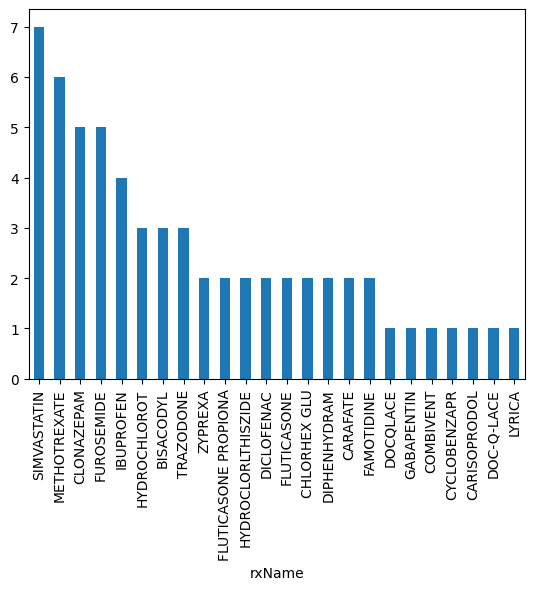

In [37]:
# This client got 61 prescription in 1 month, is that normal?
filtered_df.rxName.value_counts().plot(kind='bar')

In [38]:
# NDC (National Drug code) got some duplications in one month
# Question: Is this client taking the same drug multiple times?
filtered_df.rxNDC.value_counts()

rxNDC
54455025       4
378020810      4
53746046605    4
603294932      3
50111044102    2
16729000617    2
54327099       2
2411630        2
68382006805    2
603014521      2
54569583401    2
536338101      2
58914017014    2
603385621      2
603334032      1
60505085003    1
54569594200    1
378001401      1
71101668       1
54458093910    1
603294921      1
33358006490    1
591033801      1
472003616      1
50383072016    1
67253032010    1
33358016420    1
378191201      1
60429019515    1
50111044101    1
591033860      1
31722022205    1
597001314      1
904792760      1
904530760      1
378020801      1
64679093602    1
55111020005    1
603307821      1
603385632      1
Name: count, dtype: int64

In [39]:
# The quantities are different, we can make an assumption with no other information added
# Assumption: This client just take as many drugs as recorded
filtered_df[filtered_df.rxNDC == 54455025]

id        rxName     rxNDC  rxQuantity  \
rxStartYear rxStartMonth                                                       
2010        1            16812  17082101  METHOTREXATE  54455025        20.0   
                         16827  17082101  METHOTREXATE  54455025        28.0   
                         16842  17082101  METHOTREXATE  54455025        36.0   
                         16843  17082101  METHOTREXATE  54455025         6.0   

                               rxForm  
rxStartYear rxStartMonth               
2010        1            16812   TABS  
                         16827   TABS  
                         16842   TABS  
                         16843   TABS

## Data Preprocessing

In [40]:
# rxName, rxNDC are providing the same info, we can drop 1 of them
# rxForm is not providing any useful information, we can drop it as well
# In this session, prescription name and the quantity is the most concern to me
# In order to merge the information into one row, I will use one-hot encoding to encode the prescription information, and accumulate the quantity
medication_df

,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
0,10007104,3,2011,AMOXICILLIN,143988775,75.00,SUSR
1,10007104,3,2011,OTIC EDGE SOLUTION,68032032814,14.00,SOL
2,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.00,SPR
3,10008102,9,2011,DIPHENHYDRAM,603333921,30.00,CAP
4,10008102,9,2011,CHLD ALLERGY,24385037926,100.00,LIQD
...,...,...,...,...,...,...,...
148333,77293102,6,2007,INDOMETHACIN,378014701,25.00,CAP
148334,77293103,3,2007,AMOXICILLIN,93415580,300.00,PDR
148335,77294101,2,2006,PRILOSEC OTC,37000045503,30.00,TCP
148336,77294102,10,2006,PROVIGIL,63459010101,30.00,TAB


In [42]:
medication_df.rxName.value_counts()

rxName
AMOXICILLIN               5163
AZITHROMYCIN              4306
IBUPROFEN                 2602
LISINOPRIL                2362
SIMVASTATIN               2181
                          ... 
FERROUSUL 325MG              1
HUMULIN N VIAL U             1
NICOTINAMIDE ZCF             1
ROSULA CLARIFYING WASH       1
DIPHENOXYLATE/ ATROP         1
Name: count, Length: 6968, dtype: int64

In [43]:
# Counting medications and summing quantities per client
med_one_hot = medication_df.pivot_table(index='id', columns='rxName', values='rxQuantity', aggfunc='sum').fillna(0)
med_one_hot.columns = med_one_hot.columns.get_level_values(0)
med_one_hot = med_one_hot.reset_index()

med_one_hot

rxName,id,HYDROCHLOROTHIAZIDE (HCTZ),HYDROCHLOROTHIZAIDE,1.5 INCH 27 GAUGE NEEDLE,"30G 0.5"" INSULIN SYRINGE",3ML SYRINGE,57 CENTRAL NERVOUS SYSTEM AGENTS,5MM MINI PEN NEEDLES,A&D,A/B OTIC,...,ZYRTEC (FILM COATED),ZYRTEC (FILM-COATED),ZYRTEC ALLGY,ZYRTEC CHILD,ZYRTEC HIVES,ZYRTEC OTC,ZYRTEC-D,ZYVOX,ZYVOX (CAPLET),ZYVOX (P.C.)
0,10007101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10007102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10007104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10008102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10009101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35662,89681101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35663,89682101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35664,89687101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35665,89688101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Save the file

In [74]:
## Save the csv file
med_one_hot.to_csv('../data/meps_meds-clean.csv')

# Client Info (meps_base_data.csv) Exploration

In [44]:
import pandas as pd

client_info_df = pd.read_csv('../data/meps_base_data.csv', index_col=0)
client_info_df

,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,miDiagnosed,anginaDiagnosed,strokeDiagnosed,emphysemaDiagnosed,asthmaDiagnosed,otherHDDiagnosed,heartFailureDiagnosed
1,10007101,15,3603.881236,28,Male,White,MARRIED,Yes,No,No,No,No,No,No,No,No,No
2,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,No,No,No,No,Yes,No,No
3,10007103,15,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
4,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
5,10008101,15,3635.552466,51,Male,Multiple,MARRIED,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,77293101,12,5154.187341,45,Male,White,MARRIED,Yes,No,No,No,No,No,No,No,No,No
61486,77293102,12,5520.770322,41,Female,White,MARRIED,No,No,No,No,No,No,No,No,No,No
61487,77293103,12,5454.718112,14,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
61488,77294101,12,9934.141271,54,Male,White,MARRIED,No,Yes,No,No,No,No,No,No,No,No


In [45]:
client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61489 entries, 1 to 61489
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     61489 non-null  int64  
 1   panel                  61489 non-null  int64  
 2   pooledWeight           61489 non-null  float64
 3   age                    61489 non-null  int64  
 4   sex                    61489 non-null  object 
 5   race                   61489 non-null  object 
 6   married                61489 non-null  object 
 7   highBPDiagnosed        61489 non-null  object 
 8   diabetesDiagnosed      61489 non-null  object 
 9   chdDiagnosed           61489 non-null  object 
 10  miDiagnosed            61489 non-null  object 
 11  anginaDiagnosed        61489 non-null  object 
 12  strokeDiagnosed        61489 non-null  object 
 13  emphysemaDiagnosed     61489 non-null  object 
 14  asthmaDiagnosed        61489 non-null  object 
 15  otherHD

In [46]:
client_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,61489.0,5.534638e+07,2.759592e+07,1.000710e+07,4.045510e+07,4.965010e+07,8.161711e+07,8.968810e+07
panel,61489.0,1.353445e+01,1.061329e+00,1.200000e+01,1.300000e+01,1.400000e+01,1.400000e+01,1.500000e+01
pooledWeight,61489.0,5.063702e+03,3.815885e+03,1.277104e+02,2.217419e+03,3.989180e+03,6.905678e+03,3.882815e+04
age,61489.0,3.357840e+01,2.288758e+01,-1.000000e+00,1.400000e+01,3.200000e+01,5.100000e+01,8.500000e+01


## Check values in every columns

In [47]:
# No duplicate
client_info_df.id.value_counts()

id
10007101    1
85628105    1
85459102    1
85459103    1
85459104    1
           ..
43431101    1
43431102    1
43431103    1
43431104    1
77294102    1
Name: count, Length: 61489, dtype: int64

In [48]:
# Looks good
client_info_df.panel.value_counts()

panel
13    18287
14    16221
15    14541
12    12440
Name: count, dtype: int64

In [49]:
# Looks good as well
client_info_df.sex.value_counts().sort_index()

sex
Female    32075
Male      29414
Name: count, dtype: int64

In [50]:
# Looks good as well
client_info_df.race.value_counts()

race
White                               42869
Black                               12325
Asian                                4080
Multiple                             1358
Amer Indian/Alaska Native             623
Native Hawaiian/Pacific Islander      234
Name: count, dtype: int64

In [51]:
# Has to be normalized due to the wide range of numbers
client_info_df.pooledWeight.value_counts()

pooledWeight
3700.451477     4
3097.748816     4
1646.494373     3
2167.963469     3
2621.195630     3
               ..
4400.339547     1
2740.464002     1
2701.379247     1
6100.118325     1
11208.776977    1
Name: count, Length: 60600, dtype: int64

In [52]:
# Age = -1: Is it anomalous? Or is it mean the client is not yet born?
client_info_df.age.value_counts().sort_index()

age
-1     1708
 0      912
 1     1005
 2      998
 3      967
       ... 
 81     213
 82     206
 83     202
 84     159
 85     711
Name: count, Length: 87, dtype: int64

In [53]:
client_info_df[client_info_df.age == -1]

,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,miDiagnosed,anginaDiagnosed,strokeDiagnosed,emphysemaDiagnosed,asthmaDiagnosed,otherHDDiagnosed,heartFailureDiagnosed
19,10016106,15,3350.219230,-1,Male,Multiple,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
105,10073104,15,2324.790489,-1,Female,Black,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
106,10073105,15,1837.365888,-1,Female,Black,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No
180,10120114,15,2889.047827,-1,Male,White,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No
237,10140201,15,2764.797184,-1,Male,White,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61278,77160103,12,18759.809822,-1,Male,White,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No
61310,77181103,12,8746.688409,-1,Male,White,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No
61386,77232104,12,1971.934240,-1,Female,Black,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No
61396,77235103,12,6894.831464,-1,Male,Native Hawaiian/Pacific Islander,INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No


In [54]:
# Age=-1 should be some mistakes since it has values in some target columns
client_info_df[client_info_df.age == -1]['highBPDiagnosed'].value_counts()

highBPDiagnosed
Inapplicable    1598
No                84
Yes               25
DK                 1
Name: count, dtype: int64

## Check target values

In [55]:
client_info_df.highBPDiagnosed.value_counts()

highBPDiagnosed
No                 29525
Inapplicable       18270
Yes                13637
DK                    48
not ascertained        5
Refused                4
Name: count, dtype: int64

In [56]:
client_info_df.diabetesDiagnosed.value_counts()

diabetesDiagnosed
No                 38848
Inapplicable       18270
Yes                 4340
DK                    19
not ascertained        7
Refused                5
Name: count, dtype: int64

In [57]:
client_info_df.chdDiagnosed.value_counts()

chdDiagnosed
No                 40844
Inapplicable       18270
Yes                 2328
DK                    36
not ascertained        7
Refused                4
Name: count, dtype: int64

In [58]:
client_info_df.miDiagnosed.value_counts()

miDiagnosed
No                 41658
Inapplicable       18270
Yes                 1527
DK                    22
not ascertained        7
Refused                5
Name: count, dtype: int64

In [59]:
client_info_df.anginaDiagnosed.value_counts()

anginaDiagnosed
No                 42031
Inapplicable       18270
Yes                 1138
DK                    37
not ascertained        7
Refused                6
Name: count, dtype: int64

In [60]:
client_info_df.strokeDiagnosed.value_counts()

strokeDiagnosed
No                 41630
Inapplicable       18270
Yes                 1556
DK                    20
not ascertained        8
Refused                5
Name: count, dtype: int64

In [61]:
client_info_df.emphysemaDiagnosed.value_counts()

emphysemaDiagnosed
No                 42285
Inapplicable       18270
Yes                  907
DK                    15
not ascertained        7
Refused                5
Name: count, dtype: int64

In [62]:
client_info_df.asthmaDiagnosed.value_counts()

asthmaDiagnosed
No                 54425
Yes                 6001
Inapplicable        1035
DK                    19
Refused                8
not ascertained        1
Name: count, dtype: int64

In [63]:
client_info_df.heartFailureDiagnosed.value_counts()

heartFailureDiagnosed
No     61056
Yes      433
Name: count, dtype: int64

## Put highBPDiagnosed as the target value

In [64]:
client_info_df.columns

Index(['id', 'panel', 'pooledWeight', 'age', 'sex', 'race', 'married',
       'highBPDiagnosed', 'diabetesDiagnosed', 'chdDiagnosed', 'miDiagnosed',
       'anginaDiagnosed', 'strokeDiagnosed', 'emphysemaDiagnosed',
       'asthmaDiagnosed', 'otherHDDiagnosed', 'heartFailureDiagnosed'],
      dtype='object')

In [65]:
# Drop irrelevant columns (panel has no effect to the outcome so I drop it as well)
# client_info_df = client_info_df[['id', 'pooledWeight', 'age', 'sex', 'race', 'married', 'heartFailureDiagnosed']]
client_info_df = client_info_df[['id', 'pooledWeight', 'age', 'sex', 'race', 'married', 'highBPDiagnosed']]
client_info_df

,id,pooledWeight,age,sex,race,married,highBPDiagnosed
1,10007101,3603.881236,28,Male,White,MARRIED,Yes
2,10007102,2544.550424,25,Female,White,MARRIED,No
3,10007103,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable
4,10007104,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable
5,10008101,3635.552466,51,Male,Multiple,MARRIED,No
...,...,...,...,...,...,...,...
61485,77293101,5154.187341,45,Male,White,MARRIED,Yes
61486,77293102,5520.770322,41,Female,White,MARRIED,No
61487,77293103,5454.718112,14,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable
61488,77294101,9934.141271,54,Male,White,MARRIED,No


## Data preprocessing

In [66]:
# Drop all unknown
client_info_df = client_info_df.loc[(client_info_df['highBPDiagnosed'] == "Yes") | (client_info_df['highBPDiagnosed'] == "No")]
client_info_df

,id,pooledWeight,age,sex,race,married,highBPDiagnosed
1,10007101,3603.881236,28,Male,White,MARRIED,Yes
2,10007102,2544.550424,25,Female,White,MARRIED,No
5,10008101,3635.552466,51,Male,Multiple,MARRIED,No
6,10008102,4367.816253,53,Female,Asian,MARRIED,No
8,10009101,6241.938280,61,Female,Black,NEVER MARRIED,Yes
...,...,...,...,...,...,...,...
61484,77291102,6086.437027,58,Female,White,MARRIED,No
61485,77293101,5154.187341,45,Male,White,MARRIED,Yes
61486,77293102,5520.770322,41,Female,White,MARRIED,No
61488,77294101,9934.141271,54,Male,White,MARRIED,No


In [67]:
# Scale pooledWeight to sum to 1
client_info_df['normalized_weight'] = client_info_df['pooledWeight'] / client_info_df['pooledWeight'].sum()

# Remove negative age
client_info_df = client_info_df[client_info_df['age'] > 0]

# Encode the 'sex' column into binary (Male = 1; Female = 0)
client_info_df['sex'] = client_info_df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# One-hot encode the 'race' column, return int (1 and 0)
client_info_df = pd.get_dummies(client_info_df, columns=['race'], prefix='race', dtype=int)

# Encode the 'married' column into only binary classes (married = 1; or single = 0)
client_info_df['married'] = client_info_df['married'].apply(lambda x: 1 if x == 'MARRIED' or x == 'MARRIED IN ROUND' else 0)

# Convert 'highBPDiagnosed' target column to binary values
client_info_df['highBPDiagnosed'] = client_info_df['highBPDiagnosed'].apply(lambda x: 1 if x == 'Yes' else 0)

client_info_df

/var/folders/m_/2kwyqrdd3hl2_rx9qpm527p80000gn/T/ipykernel_11021/476859975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_info_df['normalized_weight'] = client_info_df['pooledWeight'] / client_info_df['pooledWeight'].sum()
/var/folders/m_/2kwyqrdd3hl2_rx9qpm527p80000gn/T/ipykernel_11021/476859975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_info_df['sex'] = client_info_df['sex'].apply(lambda x: 1 if x == 'Male' else 0)


,id,pooledWeight,age,sex,married,highBPDiagnosed,normalized_weight,race_Amer Indian/Alaska Native,race_Asian,race_Black,race_Multiple,race_Native Hawaiian/Pacific Islander,race_White
1,10007101,3603.881236,28,1,1,1,0.000016,0,0,0,0,0,1
2,10007102,2544.550424,25,0,1,0,0.000011,0,0,0,0,0,1
5,10008101,3635.552466,51,1,1,0,0.000016,0,0,0,1,0,0
6,10008102,4367.816253,53,0,1,0,0.000019,0,1,0,0,0,0
8,10009101,6241.938280,61,0,0,1,0.000027,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61484,77291102,6086.437027,58,0,1,0,0.000026,0,0,0,0,0,1
61485,77293101,5154.187341,45,1,1,1,0.000022,0,0,0,0,0,1
61486,77293102,5520.770322,41,0,1,0,0.000024,0,0,0,0,0,1
61488,77294101,9934.141271,54,1,1,0,0.000043,0,0,0,0,0,1


In [68]:
# Define age bins and labels
bins = [0, 18, 35, 50, 65, 100]
labels = ['0–18', '18–35', '35–50', '50–65', '65+']
client_info_df['age_group'] = pd.cut(client_info_df['age'], bins=bins, labels=labels)

# Encode age group into one-hot encoding
age_dummies = pd.get_dummies(client_info_df['age_group'], prefix='age', dtype=int)
client_info_df = pd.concat([client_info_df, age_dummies], axis=1)
client_info_df

,id,pooledWeight,age,sex,married,highBPDiagnosed,normalized_weight,race_Amer Indian/Alaska Native,race_Asian,race_Black,race_Multiple,race_Native Hawaiian/Pacific Islander,race_White,age_group,age_0–18,age_18–35,age_35–50,age_50–65,age_65+
1,10007101,3603.881236,28,1,1,1,0.000016,0,0,0,0,0,1,18–35,0,1,0,0,0
2,10007102,2544.550424,25,0,1,0,0.000011,0,0,0,0,0,1,18–35,0,1,0,0,0
5,10008101,3635.552466,51,1,1,0,0.000016,0,0,0,1,0,0,50–65,0,0,0,1,0
6,10008102,4367.816253,53,0,1,0,0.000019,0,1,0,0,0,0,50–65,0,0,0,1,0
8,10009101,6241.938280,61,0,0,1,0.000027,0,0,1,0,0,0,50–65,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61484,77291102,6086.437027,58,0,1,0,0.000026,0,0,0,0,0,1,50–65,0,0,0,1,0
61485,77293101,5154.187341,45,1,1,1,0.000022,0,0,0,0,0,1,35–50,0,0,1,0,0
61486,77293102,5520.770322,41,0,1,0,0.000024,0,0,0,0,0,1,35–50,0,0,1,0,0
61488,77294101,9934.141271,54,1,1,0,0.000043,0,0,0,0,0,1,50–65,0,0,0,1,0


In [69]:
client_info_df.columns

Index(['id', 'pooledWeight', 'age', 'sex', 'married', 'highBPDiagnosed',
       'normalized_weight', 'race_Amer Indian/Alaska Native', 'race_Asian',
       'race_Black', 'race_Multiple', 'race_Native Hawaiian/Pacific Islander',
       'race_White', 'age_group', 'age_0–18', 'age_18–35', 'age_35–50',
       'age_50–65', 'age_65+'],
      dtype='object')

In [70]:
# Rearrange and remove redundant columns
client_info_df = client_info_df[
    ['id', 'normalized_weight', 'sex', 'married', 'race_Amer Indian/Alaska Native',
     'race_Asian', 'race_Black', 'race_Multiple', 'race_Native Hawaiian/Pacific Islander',
     'race_White', 'age_0–18', 'age_18–35', 'age_35–50', 'age_50–65', 'age_65+',
     'highBPDiagnosed']
]
client_info_df

,id,normalized_weight,sex,married,race_Amer Indian/Alaska Native,race_Asian,race_Black,race_Multiple,race_Native Hawaiian/Pacific Islander,race_White,age_0–18,age_18–35,age_35–50,age_50–65,age_65+,highBPDiagnosed
1,10007101,0.000016,1,1,0,0,0,0,0,1,0,1,0,0,0,1
2,10007102,0.000011,0,1,0,0,0,0,0,1,0,1,0,0,0,0
5,10008101,0.000016,1,1,0,0,0,1,0,0,0,0,0,1,0,0
6,10008102,0.000019,0,1,0,1,0,0,0,0,0,0,0,1,0,0
8,10009101,0.000027,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61484,77291102,0.000026,0,1,0,0,0,0,0,1,0,0,0,1,0,0
61485,77293101,0.000022,1,1,0,0,0,0,0,1,0,0,1,0,0,1
61486,77293102,0.000024,0,1,0,0,0,0,0,1,0,0,1,0,0,0
61488,77294101,0.000043,1,1,0,0,0,0,0,1,0,0,0,1,0,0


In [71]:
client_info_df.highBPDiagnosed.value_counts()

highBPDiagnosed
0    29441
1    13612
Name: count, dtype: int64

## Save the file

In [75]:
client_info_df.to_csv('../data/meps-base-highBPDiagnosed-clean.csv')

# Merge the dataframe and analyze

In [76]:
import pandas as pd

mep_meds = pd.read_csv('../data/meps_meds-clean.csv', index_col=0)

In [77]:
meps_base_data = pd.read_csv('../data/meps-base-highBPDiagnosed-clean.csv', index_col=0)

In [78]:
combined_df = pd.merge(mep_meds, meps_base_data, on='id', how='left')
combined_df

,id,HYDROCHLOROTHIAZIDE (HCTZ),HYDROCHLOROTHIZAIDE,1.5 INCH 27 GAUGE NEEDLE,"30G 0.5"" INSULIN SYRINGE",3ML SYRINGE,57 CENTRAL NERVOUS SYSTEM AGENTS,5MM MINI PEN NEEDLES,A&D,A/B OTIC,...,race_Black,race_Multiple,race_Native Hawaiian/Pacific Islander,race_White,age_0–18,age_18–35,age_35–50,age_50–65,age_65+,highBPDiagnosed
0,10007101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,10007102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10007104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10008102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10009101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35662,89681101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
35663,89682101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
35664,89687101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
35665,89688101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
combined_df.dropna(inplace=True)

In [80]:
combined_df.highBPDiagnosed.value_counts()

highBPDiagnosed
0.0    15996
1.0    10669
Name: count, dtype: int64

## Find the most correlated medications columns

* Since sometimes a single feature would not contribute much to the target but a feature group with 2 or more features would
    * Due to the limited time and computing resource, here we will not explore all the possibilities without thousands of features
    * We will first lower the number of features down to 200
    * In the 2nd filter, we will use Recursive Feature Elimination (RFE) to reduce 200 features to 100
        * Ideally, we should see if some feature pairs (consist of only 2 features) from these 200 features are having high correlation with the target column
        * But again, due to the constraints, here we will only explore single feature

    * Remarks: I tried fewer features (original -> 50 -> 20) but the results is a bit worse
     

In [81]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from itertools import combinations

In [82]:
meps_base_data.columns

Index(['id', 'normalized_weight', 'sex', 'married',
       'race_Amer Indian/Alaska Native', 'race_Asian', 'race_Black',
       'race_Multiple', 'race_Native Hawaiian/Pacific Islander', 'race_White',
       'age_0–18', 'age_18–35', 'age_35–50', 'age_50–65', 'age_65+',
       'highBPDiagnosed'],
      dtype='object')

In [83]:
X = combined_df.drop(columns=meps_base_data.columns[1:])
y = combined_df['highBPDiagnosed']

X.shape, y.shape

((26665, 6969), (26665,))

In [84]:
# Compute correlation for feature columns with the target y
correlations = X.corrwith(y).abs().sort_values(ascending=False)

# Extract the top 50 columns with the highest correlation
top_200_columns = correlations.head(200).index.tolist()

# Keep only the top 50 columns
top_features = X[top_200_columns]

top_features

/Users/dantelok/Desktop/clover-health/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/dantelok/Desktop/clover-health/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,LISINOPRIL,AMLODIPINE,HYDROCHLOROTHIAZIDE,AMLODIPINE BESYLATE,HYDROCHLOROT,SIMVASTATIN,FUROSEMIDE,DIOVAN,ATENOLOL,OMEPRAZOLE,...,DILTIAZEM HYDROCHLORIDE CD,ONETOUCH,WARFARIN SODIUM,GLIPIZIDE XL,HCTZ,PROCRIT,FELODIPINE,NITROGLYCER,BRIMONIDINE,POT CHLORIDE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,90.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35663,0.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
correlations.head(200)

LISINOPRIL             0.153872
AMLODIPINE             0.108629
HYDROCHLOROTHIAZIDE    0.104640
AMLODIPINE BESYLATE    0.101035
HYDROCHLOROT           0.092386
                         ...   
PROCRIT                0.022254
FELODIPINE             0.022246
NITROGLYCER            0.022201
BRIMONIDINE            0.022106
POT CHLORIDE           0.022079
Length: 200, dtype: float64

In [86]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(top_features)
X_scaled

array([[-0.17849406, -0.1006638 , -0.11023914, ..., -0.024064  ,
        -0.01901439, -0.0346078 ],
       [-0.17849406, -0.1006638 , -0.11023914, ..., -0.024064  ,
        -0.01901439, -0.0346078 ],
       [-0.17849406, -0.1006638 , -0.11023914, ..., -0.024064  ,
        -0.01901439, -0.0346078 ],
       ...,
       [-0.17849406, -0.1006638 , -0.11023914, ..., -0.024064  ,
        -0.01901439, -0.0346078 ],
       [-0.17849406, -0.1006638 , -0.11023914, ..., -0.024064  ,
        -0.01901439, -0.0346078 ],
       [-0.17849406, -0.1006638 , -0.11023914, ..., -0.024064  ,
        -0.01901439, -0.0346078 ]])

## Recursive Feature Elimination: Eliminate the least correlated medication feature at a time

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Apply RFE to select the most important interactions and original features
model = LogisticRegression(max_iter=1000)
num_features_to_select = 100
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select, step=1)
rfe.fit(X_scaled, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=100)

In [88]:
# Get selected feature names
selected_features = [f for f, support in zip(top_features.columns, rfe.support_) if support]

print("Selected features including interactions:")
print(selected_features)

Selected features including interactions:
['LISINOPRIL', 'AMLODIPINE', 'HYDROCHLOROTHIAZIDE', 'AMLODIPINE BESYLATE', 'HYDROCHLOROT', 'SIMVASTATIN', 'FUROSEMIDE', 'DIOVAN', 'ATENOLOL', 'OMEPRAZOLE', 'METFORMIN', 'METOPROLOL TARTRATE', 'LISINOP/HCTZ', 'NORVASC', 'METOPROLOL', 'HCTZ/LISINOPRIL', 'LOSARTAN POT', 'DIOVAN HCT', 'BENICAR', 'PLAVIX (FILM-COATED)', 'HYDROCHLOROTHIAZIDE-LISINOPRIL', 'ACTOS', 'BYSTOLIC', 'HYDRALAZINE', 'WARFARIN', 'CLONIDINE', 'ALLOPURINOL', 'SIMVASTATIN (FILM-COATED)', 'LANTUS', 'AZOR', 'CARVEDILOL (FILM-COATED)', 'JANUVIA', 'EXFORGE', 'BENAZEPRIL', 'CLONIDINE HCL', 'METOPROLOL TARTRATE (FILM-COATED)', 'TRAMADOL HCL', 'GLYBURIDE', 'BENICAR HCT', 'DILTIAZEM', 'LISINO-HCTZ', 'HCTZ/TRIAMTERENE', 'NIFEDIPINE ER', 'PRENATAL PLUS', 'PRENATAL', 'AMOXICILLIN', 'KLOR-CON 10', 'KLOR-CON M20', 'BENAZEPRIL HYDROCHLORIDE', 'CLONIDINE HYDROCHLORIDE', 'AVAPRO', 'LOTREL', 'HYZAAR', 'LOSARTAN/HCT', 'EXFORGE (FILM-COATED)', 'RAMIPRIL', 'MICARDIS', 'LOSARTAN', 'TOPROL XL', 'MICARD

In [89]:
# Final medications dataset with only selected features
X_final = top_features[selected_features]
X_final

,LISINOPRIL,AMLODIPINE,HYDROCHLOROTHIAZIDE,AMLODIPINE BESYLATE,HYDROCHLOROT,SIMVASTATIN,FUROSEMIDE,DIOVAN,ATENOLOL,OMEPRAZOLE,...,DILTIAZEM HCL,CADUET,APRI,CARDIZEM LA,QUINAPRIL HCL (FILM-COATED),RENVELA,FOSINOPRIL SODIUM,PROCRIT,NITROGLYCER,BRIMONIDINE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,90.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35663,0.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Review correlation value
correlations = X_final.corrwith(y).abs().sort_values(ascending=False)

correlations

LISINOPRIL             0.153872
AMLODIPINE             0.108629
HYDROCHLOROTHIAZIDE    0.104640
AMLODIPINE BESYLATE    0.101035
HYDROCHLOROT           0.092386
                         ...   
RENVELA                0.023016
FOSINOPRIL SODIUM      0.022514
PROCRIT                0.022254
NITROGLYCER            0.022201
BRIMONIDINE            0.022106
Length: 100, dtype: float64

In [91]:
# Add back the id column to the med dataset
X_final['id'] = combined_df['id']
X_final

/var/folders/m_/2kwyqrdd3hl2_rx9qpm527p80000gn/T/ipykernel_11021/74858707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['id'] = combined_df['id']


,LISINOPRIL,AMLODIPINE,HYDROCHLOROTHIAZIDE,AMLODIPINE BESYLATE,HYDROCHLOROT,SIMVASTATIN,FUROSEMIDE,DIOVAN,ATENOLOL,OMEPRAZOLE,...,CADUET,APRI,CARDIZEM LA,QUINAPRIL HCL (FILM-COATED),RENVELA,FOSINOPRIL SODIUM,PROCRIT,NITROGLYCER,BRIMONIDINE,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10007101
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10007102
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10008102
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10009101
5,0.0,90.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10012102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89681101
35663,0.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89682101
35664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89687101
35665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89688101


## Merge the client base info dataset by id

In [92]:
# Merge again with the remaining features
combined_df = pd.merge(meps_base_data, X_final, on='id', how='right')
combined_df

,id,normalized_weight,sex,married,race_Amer Indian/Alaska Native,race_Asian,race_Black,race_Multiple,race_Native Hawaiian/Pacific Islander,race_White,...,DILTIAZEM HCL,CADUET,APRI,CARDIZEM LA,QUINAPRIL HCL (FILM-COATED),RENVELA,FOSINOPRIL SODIUM,PROCRIT,NITROGLYCER,BRIMONIDINE
0,10007101,0.000016,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10007102,0.000011,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10008102,0.000019,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10009101,0.000027,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10012102,0.000044,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,89681101,0.000018,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26661,89682101,0.000011,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26662,89687101,0.000007,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26663,89688101,0.000013,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Review correlation value
correlations = combined_df.corrwith(y).abs().sort_values(ascending=False)

correlations

age_50–65                   0.018563
CARVEDILOL (FILM-COATED)    0.018024
MICARDIS HCT                0.017323
BYSTOLIC                    0.015585
LANTUS                      0.015425
                              ...   
LISINOP/HCTZ                0.000615
BENAZEPRIL                  0.000527
married                     0.000387
PRENATAL                    0.000139
SIMVASTATIN                 0.000053
Length: 116, dtype: float64

In [ ]:
combined_df.to_csv('data/100-highBPDiagnosed-clean-data.csv')